# Image transformation and classification with VAE for MNIST in Tensorflow

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.metrics import accuracy_score

## MNIST Data

In [2]:
# Binarize the images
def binarize(images, threshold=0.1):
  return (threshold < images).astype('float32')

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

mnist = get_data()
x_train = binarize(mnist.train.images)
y_train = mnist.train.labels

x_test = binarize(mnist.test.images)
y_test = mnist.test.labels
print(np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

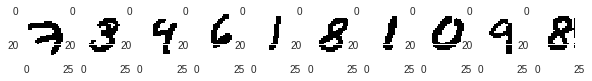

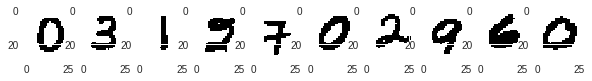

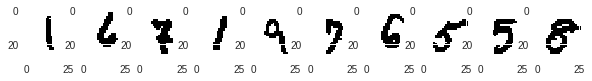

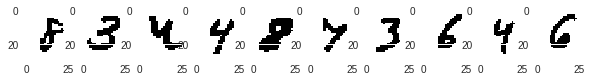

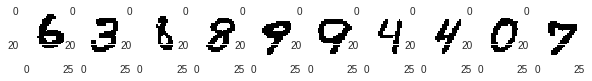

In [3]:
for j in range(5):  
  plt.figure(figsize = (10,2))
  for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[j*10 + i].reshape([28,28]))

In [4]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Inverse-MNIST

(280, 280)


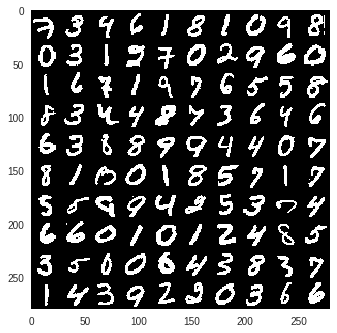

In [5]:
# Binarize the images
def inverse(images):
  return (images == 0).astype('float32')

inv_train = inverse(x_train)
inv_test = inverse(x_test)
total_figure = np.zeros((280, 280))
for i in range(10):
  for j in range(10):
    total_figure[i*28 : (i+1)*28, j*28 :(j+1)*28] = inv_train[i*10+j].reshape([28,28])
print(np.shape(total_figure))
plt.grid(False)
plt.imshow(total_figure)

## 1D-Rotation-MNIST

number of data: 55000
shape of output: (55000, 28, 28, 3)
1.4901161138336505e-09 1.200000023841858
number of data: 10000
shape of output: (10000, 28, 28, 3)
1.4901161138336505e-09 1.200000023841858
2.3283064365386963e-10 0.9999999997671694 2.3283064365386963e-10 0.9999999997671694
(280, 280)


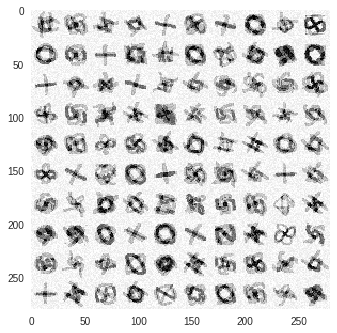

In [5]:
def transformation(x):
  num = np.shape(x)[0]
  print('number of data: {}'.format(num))
  x = x.reshape([-1,28,28, 1])
  x_90 = np.rot90(x, k=1, axes = (1, 2))
  x_180 = np.rot90(x, k=2, axes = (1, 2))
  x_270 = np.rot90(x, k=3, axes = (1, 2))
  noise = np.clip(np.random.normal(loc=0.0, scale=0.1, size=[num, 28, 28, 1]), -0.1, 0.1)
  trans_x = np.concatenate((x_90, x_180, x_270), axis = -1) + 0.1 + noise
  print('shape of output: {}'.format(np.shape(trans_x)))
  Min = np.amin(trans_x)
  Max = np.amax(trans_x)
  print(Min, Max)
  return (trans_x - Min) / (Max - Min)

inter_train = transformation(x_train)
inter_test = transformation(x_test)
rot_train1 = np.clip(np.mean(inter_train, axis = -1).reshape([-1, 784]), 2**(-32), 1-2**(-32))
rot_test1 = np.clip(np.mean(inter_test, axis = -1).reshape([-1, 784]), 2**(-32), 1-2**(-32))
print(np.amin(rot_train1), np.amax(rot_train1), np.amin(rot_test1), np.amax(rot_test1))

mean_figure = np.zeros((280, 280))
for i in range(10):
  for j in range(10):
    mean_figure[i*28 : (i+1)*28, j*28 :(j+1)*28] = rot_train1[i*10+j].reshape([28,28])
print(np.shape(mean_figure))

plt.grid(False)
plt.imshow(mean_figure)

## 3D-Rotation-MNIST

number of data: 55000
shape of output: (55000, 28, 28, 3)
0.0 0.6
number of data: 10000
shape of output: (10000, 28, 28, 3)
0.0 0.6
(280, 280, 3)


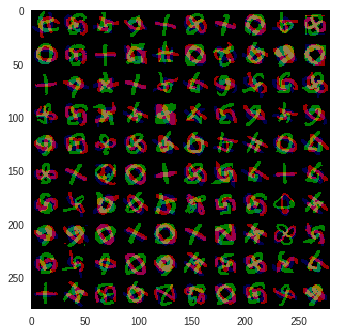

In [5]:
def transformation(x):
  num = np.shape(x)[0]
  print('number of data: {}'.format(num))
  x = x.reshape([-1,28,28, 1])
  x_90 = np.rot90(x, k=1, axes = (1, 2)) * .6
  x_180 = np.rot90(x, k=2, axes = (1, 2)) * .5
  x_270 = np.rot90(x, k=3, axes = (1, 2)) * .3
  noise = np.random.normal(loc=0.0, scale=0.5, size=[num, 28, 28, 1])
  trans_x = np.concatenate((x_90, x_180, x_270), axis = -1)
  print('shape of output: {}'.format(np.shape(trans_x)))
  Min = np.amin(trans_x)
  Max = np.amax(trans_x)
  print(Min, Max)
  return trans_x

rot_train3 = transformation(x_train)
rot_test3 = transformation(x_test)

total_figure = np.zeros((280, 280, 3))
for i in range(10):
  for j in range(10):
    total_figure[i*28 : (i+1)*28, j*28 :(j+1)*28, :] = rot_train3[i*10+j]
print(np.shape(total_figure))
plt.grid(False)
plt.imshow(total_figure)

# Main Model for MNIST and Inverse-MNIST

In [0]:
class ClassificationAndTransformation:
  def __init__(self, original_dim=784, class_dim = 10, image_dim = 28, 
               kernel_size = [3, 3], filter_num = 12, batch_size=100, 
               latent_dim = 10, learning_rate = 0.0001, regular_rate = 0.0):
    # dimensions
    self.c_dim = class_dim
    self.o_dim = original_dim
    self.l_dim = latent_dim
    self.i_dim = image_dim
    
    # other parameters
    self.batch_size = batch_size
    self.k_size = kernel_size
    self.f_num = filter_num
    self.lr = learning_rate
    self.rr = regular_rate
    
    # build the model
    tf.reset_default_graph()
    self.init = tf.contrib.layers.xavier_initializer()
    self.all_inputs()
    self.encoder_networks()
    self.decoder_networks()
    self.cal_loss()
    self.optimizer()
    self.inference()
    
    
    
  def all_inputs(self):
    # input of image and corresponding label, unsupervised learning
    self.x = tf.placeholder(tf.float32, [self.batch_size, self.o_dim])
    self.inv = tf.placeholder(tf.float32, [self.batch_size, self.o_dim])
    self.y = tf.placeholder(tf.float32, [self.batch_size, self.c_dim])
    
    
    
  def feature_extraction_x(self, x):
    # get features from image x
    with tf.variable_scope("feature_x", reuse=tf.AUTO_REUSE):
      x_in = tf.reshape(x, [self.batch_size, self.i_dim, self.i_dim, 1])
      # conv layer 1
      x_conv1 = tf.layers.conv2d(inputs = x_in, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      x_maxpool1 = tf.layers.max_pooling2d(inputs = x_conv1, 
                                           pool_size = [2, 2], strides = 2)

      # conv layer 2
      x_conv2 = tf.layers.conv2d(inputs = x_maxpool1, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      x_maxpool2 = tf.layers.max_pooling2d(inputs = x_conv2, 
                                           pool_size = [2, 2], strides = 2)

      # flatten
      x_flatten = tf.reshape(x_maxpool2, [self.batch_size, -1])

      # get mean and variance of z
      x_feature = tf.layers.dense(x_flatten, 300, activation = None,
                                  kernel_initializer=self.init)

      return x_feature
    
    
    
  def feature_extraction_x_class(self, x):
    # get features from image x
    with tf.variable_scope("feature_x_class", reuse=tf.AUTO_REUSE):
      x_in = tf.reshape(x, [self.batch_size, self.i_dim, self.i_dim, 1])
      # conv layer 1
      x_conv1 = tf.layers.conv2d(inputs = x_in, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      x_maxpool1 = tf.layers.max_pooling2d(inputs = x_conv1, 
                                           pool_size = [2, 2], strides = 2)

      # conv layer 2
      x_conv2 = tf.layers.conv2d(inputs = x_maxpool1, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      x_maxpool2 = tf.layers.max_pooling2d(inputs = x_conv2, 
                                           pool_size = [2, 2], strides = 2)

      # flatten
      x_flatten = tf.reshape(x_maxpool2, [self.batch_size, -1])

      # get mean and variance of z
      x_feature = tf.layers.dense(x_flatten, 300, activation = None,
                                  kernel_initializer=self.init)

      return x_feature
  
    
    
  def feature_extraction_inv(self, inv):
    # get features from image inv
    with tf.variable_scope("feature_inv", reuse=tf.AUTO_REUSE):
      inv_in = tf.reshape(inv, [self.batch_size, self.i_dim, self.i_dim, 1])
      # conv layer 1
      i_conv1 = tf.layers.conv2d(inputs = inv_in, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      i_maxpool1 = tf.layers.max_pooling2d(inputs = i_conv1, 
                                           pool_size = [2, 2], strides = 2)
      
      # conv layer 2
      i_conv2 = tf.layers.conv2d(inputs = i_maxpool1, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      i_maxpool2 = tf.layers.max_pooling2d(inputs = i_conv2, 
                                           pool_size = [2, 2], strides = 2)
      
      # flatten
      i_flatten = tf.reshape(i_maxpool2, [self.batch_size, -1])
      
      # get mean and variance of z
      i_feature = tf.layers.dense(i_flatten, 300, activation = None, 
                                  kernel_initializer=self.init)
      
      return i_feature
    

    
  def feature_extraction_inv_class(self, inv):
    # get features from image inv
    with tf.variable_scope("feature_inv_class", reuse=tf.AUTO_REUSE):
      inv_in = tf.reshape(inv, [self.batch_size, self.i_dim, self.i_dim, 1])
      # conv layer 1
      i_conv1 = tf.layers.conv2d(inputs = inv_in, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      i_maxpool1 = tf.layers.max_pooling2d(inputs = i_conv1, 
                                           pool_size = [2, 2], strides = 2)
      
      # conv layer 2
      i_conv2 = tf.layers.conv2d(inputs = i_maxpool1, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      i_maxpool2 = tf.layers.max_pooling2d(inputs = i_conv2, 
                                           pool_size = [2, 2], strides = 2)
      
      # flatten
      i_flatten = tf.reshape(i_maxpool2, [self.batch_size, -1])
      
      # get mean and variance of z
      i_feature = tf.layers.dense(i_flatten, 300, activation = None, 
                                  kernel_initializer=self.init)
      
      return i_feature
    
    
  def encoder_layer_x(self, x_feature, y):
    # get z from these features
    with tf.variable_scope("encoder_x", reuse=tf.AUTO_REUSE):
      e_input = tf.concat([x_feature, y], axis = 1)
      
      e_mu = tf.layers.dense(e_input, self.l_dim, activation = None, 
                             kernel_initializer=self.init)
      e_logsigma = tf.layers.dense(e_input, self.l_dim, activation = None, 
                                   kernel_initializer=self.init)
      
      return e_mu, e_logsigma
    
    
    
  def encoder_layer_xinv(self, x_feature, i_feature, y):
    # get z from these features
    with tf.variable_scope("encoder_xinv", reuse=tf.AUTO_REUSE):
      e_input = tf.concat([x_feature, i_feature, y], axis = 1)
      
      e_mu = tf.layers.dense(e_input, self.l_dim, activation = None, 
                             kernel_initializer=self.init)
      e_logsigma = tf.layers.dense(e_input, self.l_dim, activation = None, 
                                   kernel_initializer=self.init)
      
      return e_mu, e_logsigma
    
    
    
  def encoder_layer_inv(self, i_feature, y):
    # get z from these features
    with tf.variable_scope("encoder_inv", reuse=tf.AUTO_REUSE):
      e_input = tf.concat([i_feature, y], axis = 1)
      
      e_mu = tf.layers.dense(e_input, self.l_dim, activation = None, 
                             kernel_initializer=self.init)
      e_logsigma = tf.layers.dense(e_input, self.l_dim, activation = None, 
                                   kernel_initializer=self.init)
      
      return e_mu, e_logsigma
    
    
    
  def classification_layer_x(self, x_feature):
    # get class from these features
    with tf.variable_scope("classification_x", reuse=tf.AUTO_REUSE):
      c_logits = tf.layers.dense(x_feature, self.c_dim, 
                                 kernel_initializer=self.init)
      
      return c_logits
    
    
    
  def classification_layer_xinv(self, x_feature, i_feature):
    # get class from these features
    with tf.variable_scope("classification_xinv", reuse=tf.AUTO_REUSE):
      c_input = tf.concat([x_feature, i_feature], axis = 1)
      c_logits = tf.layers.dense(c_input, self.c_dim, 
                                 kernel_initializer=self.init)
      
      return c_logits
    
    
    
  def classification_layer_inv(self, i_feature):
    # get class from these features
    with tf.variable_scope("classification_inv", reuse=tf.AUTO_REUSE):
      c_logits = tf.layers.dense(i_feature, self.c_dim, 
                                 kernel_initializer=self.init)
      
      return c_logits

    
    
  def decoder_layers_x(self, z, y):
    # get x from latent variable z and y
    with tf.variable_scope("decoder_x", reuse=tf.AUTO_REUSE):
      d_input = tf.concat([z, y], axis = -1)
      d_h1 = tf.layers.dense(d_input, 300, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_h2 = tf.layers.dense(d_h1, 500, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_logits = tf.layers.dense(d_h2, self.o_dim, 
                                 kernel_initializer=self.init)
      
      return d_logits
    
    
    
  def decoder_layers_inv(self, z, y):
    # get inv from latent variablee z and y
    with tf.variable_scope("decoder_inv", reuse=tf.AUTO_REUSE):
      d_input = tf.concat([z, y], axis = -1)
      d_h1 = tf.layers.dense(d_input, 300, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_h2 = tf.layers.dense(d_h1, 500, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_h3 = tf.layers.dense(d_h2, 700, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_logits = tf.layers.dense(d_h3, self.o_dim, 
                                 kernel_initializer=self.init)
      
      return d_logits
    
    
    
  def sampling(self, args):
    # reparameterization trick to sample from q(z|x,y)
    z_mu, z_logsigma = args
    epsilon = tf.random_normal([self.batch_size, self.l_dim], mean=0.0, stddev=1.0)
    
    return z_mu + tf.sqrt(tf.exp(z_logsigma)) * epsilon
  
  
  
  def encoder_networks(self):
    # get features from x and inv
    self.x_features = self.feature_extraction_x(self.x)
    self.inv_features = self.feature_extraction_inv(self.inv)
    
    # encoder network for label data:
    # case 1, only x:
    self.zx_mu, self.zx_logsigma = self.encoder_layer_x(self.x_features, self.y)
    self.zx = self.sampling([self.zx_mu, self.zx_logsigma])
    
    # case 2, x and inv:
    self.zxinv_mu, self.zxinv_logsigma = self.encoder_layer_xinv(self.x_features, self.inv_features, self.y)
    self.zxinv = self.sampling([self.zxinv_mu, self.zxinv_logsigma])
    
    # case 3, only inv:
    self.zinv_mu, self.zinv_logsigma = self.encoder_layer_inv(self.inv_features, self.y)
    self.zinv = self.sampling([self.zinv_mu, self.zinv_logsigma])
    
    
    # encoder network for unlabel data:
    self.onehots = [tf.one_hot([i]*self.batch_size, depth=self.c_dim) 
                    for i in range(self.c_dim)]
    # case 1, only x:
    self.zx_args = [self.encoder_layer_x(self.x_features, self.onehots[i]) for i in range(self.c_dim)]
    self.zxs = [self.sampling(self.zx_args[i]) for i in range(self.c_dim)]
    
    # case 2, x and inv:
    self.zxinv_args = [self.encoder_layer_xinv(self.x_features, self.inv_features, self.onehots[i]) for i in range(self.c_dim)]
    self.zxinvs = [self.sampling(self.zxinv_args[i]) for i in range(self.c_dim)]
    
    # case 3, only inv:
    self.zinv_args = [self.encoder_layer_inv(self.inv_features, self.onehots[i]) for i in range(self.c_dim)]
    self.zinvs = [self.sampling(self.zinv_args[i]) for i in range(self.c_dim)]
    
    
    # classification network
    self.x_features_class = self.feature_extraction_x_class(self.x)
    self.inv_features_class = self.feature_extraction_inv_class(self.inv)
    
    # case 1: only x
    self.yx_logits = self.classification_layer_x(self.x_features_class)
    self.yx_pred = tf.nn.softmax(self.yx_logits)
    
    # case 2: x and inv
    self.yxinv_logits = self.classification_layer_xinv(self.x_features_class, self.inv_features_class)
    self.yxinv_pred = tf.nn.softmax(self.yxinv_logits)
    
    # case 3: only inv
    self.yinv_logits = self.classification_layer_inv(self.inv_features_class)
    self.yinv_pred = tf.nn.softmax(self.yinv_logits)
    

    
  def decoder_networks(self):
    # decoder network for label data
    
    # case 1: only x
    self.x1_logits = self.decoder_layers_x(self.zx, self.y)
    self.x1_pred = tf.sigmoid(self.x1_logits)
    
    # case 2: x and inv
    self.x2_logits = self.decoder_layers_x(self.zxinv, self.y)
    self.x2_pred = tf.sigmoid(self.x2_logits)
    self.inv2_logits = self.decoder_layers_inv(self.zxinv, self.y)
    self.inv2_pred = tf.sigmoid(self.inv2_logits)
    
    # case 3: only inv
    self.inv3_logits = self.decoder_layers_inv(self.zinv, self.y)
    self.inv3_pred = tf.sigmoid(self.inv3_logits)
    
    
    # decoder network for unlabel data
    
    # case 1:
    self.x1_logits_unlabel = [self.decoder_layers_x(self.zxs[i], self.onehots[i]) 
                              for i in range(self.c_dim)]
    
    # case 2:
    self.x2_logits_unlabel = [self.decoder_layers_x(self.zxinvs[i], self.onehots[i]) 
                              for i in range(self.c_dim)]
    self.inv2_logits_unlabel = [self.decoder_layers_inv(self.zxinvs[i], self.onehots[i]) 
                                for i in range(self.c_dim)]
    
    # case 3:
    self.inv3_logits_unlabel = [self.decoder_layers_inv(self.zinvs[i], self.onehots[i]) 
                                for i in range(self.c_dim)]
    
    
  def inference(self):
    # find c* max log p(inv,c)
    self.inv_inference_logits = [self.decoder_layers_inv(self.zinv_args[i][0], self.onehots[i]) 
                                 for i in range(self.c_dim)]
    self.inv_inference_loss = [tf.reshape(tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(
        logits = self.inv_inference_logits[i], labels = self.inv), axis = -1), [self.batch_size, 1]) for i in range(self.c_dim)]
    

    
  def cal_label_loss_x(self, logits, image):
    return tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = image))
  
  def cal_unlabel_loss_x(self, logits_list, image):
    unlabel_loss = [tf.reshape(tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(
        logits = logits_list[i], labels = image), axis = -1), [self.batch_size, 1]) for i in range(self.c_dim)]
    return tf.concat(unlabel_loss, axis = 1)
    
  def cal_kl_loss(self, z_mu, z_logsigma):
    # calculate kl-loss
    kl_loss = - 0.5 * tf.reduce_sum(1 + z_logsigma - tf.square(z_mu) - tf.exp(z_logsigma))
    return kl_loss
  
  def cal_class_loss(self, y_logits):
    class_loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = y_logits, labels = self.y))
    return class_loss
  
  def cal_label_loss_inv(self, logits, image):
    return tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = image))
  
  
  def cal_unlabel_loss_inv(self, logits_list, image):
    unlabel_loss = [tf.reshape(tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(
        logits = logits_list[i], labels = image), axis = -1), [self.batch_size, 1]) for i in range(self.c_dim)]
    return tf.concat(unlabel_loss, axis = 1)
  
  def kl_unlabel(self, z_arg):
    z_mu, z_logsigma = z_arg
    kl_loss = - 0.5 * tf.reduce_sum(1 + z_logsigma - tf.square(z_mu) - tf.exp(z_logsigma), axis = 1)
    return tf.reshape(kl_loss, [self.batch_size, 1])
  
  def cal_unlabel_kl_loss(self, z_args, c_pred):
    all_kl_loss = [self.kl_unlabel(z_args[i]) for i in range(self.c_dim)]
    return tf.reduce_sum(c_pred * tf.concat(all_kl_loss, axis = 1))


  
  def cal_loss(self):
    # L2 reguralization for trainable variables
    self.train_variables = tf.trainable_variables()
    self.regularization_cost = tf.reduce_sum([tf.nn.l2_loss(variable) 
                                              for variable in self.train_variables])
    
    # case 1:
    self.label_loss_1 = self.cal_kl_loss(self.zx_mu, self.zx_logsigma) + 10 * self.cal_class_loss(self.yx_logits) + self.cal_label_loss_x(self.x1_logits, self.x)
    
    self.unlabel_loss_1 = (self.cal_unlabel_kl_loss(self.zx_args, self.yx_pred) + 
                           tf.reduce_sum(self.yx_pred * self.cal_unlabel_loss_x(self.x1_logits_unlabel, self.x)) + 
                           tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = self.yx_logits, labels = self.yx_pred)))
    
    # case 2:
    self.label_loss_2 = (self.cal_kl_loss(self.zxinv_mu, self.zxinv_logsigma) + self.cal_class_loss(self.yxinv_logits) + 
                         self.cal_label_loss_x(self.x2_logits, self.x) + self.cal_label_loss_inv(self.inv2_logits, self.inv))
    
    self.unlabel_loss_2 = (self.cal_unlabel_kl_loss(self.zxinv_args, self.yxinv_pred) + 
                           tf.reduce_sum(self.yxinv_pred * (self.cal_unlabel_loss_x(self.x2_logits_unlabel, self.x) + self.cal_unlabel_loss_inv(self.inv2_logits_unlabel, self.inv))) + 
                           tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = self.yxinv_logits, labels = self.yxinv_pred)))
    
    # case 3:
    self.label_loss_3 = self.cal_kl_loss(self.zinv_mu, self.zinv_logsigma) + self.cal_class_loss(self.yinv_logits) + self.cal_label_loss_inv(self.inv3_logits, self.inv)
    
    self.unlabel_loss_3 = (self.cal_unlabel_kl_loss(self.zinv_args, self.yinv_pred) + 
                           tf.reduce_sum(self.yinv_pred * self.cal_unlabel_loss_inv(self.inv3_logits_unlabel, self.inv)) + 
                           tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = self.yinv_logits, labels = self.yinv_pred)))
    
                         
                 
  def optimizer(self):
    # case 1:
    self.opt_label1 = tf.train.AdamOptimizer(self.lr).minimize(self.label_loss_1 + self.rr * self.regularization_cost)
    self.opt_unlabel1 = tf.train.AdamOptimizer(self.lr).minimize(self.unlabel_loss_1 + self.rr * self.regularization_cost)
    
    # case 2:
    self.opt_label2 = tf.train.AdamOptimizer(self.lr).minimize(self.label_loss_2 + self.rr * self.regularization_cost)
    self.opt_unlabel2 = tf.train.AdamOptimizer(self.lr).minimize(self.unlabel_loss_2 + self.rr * self.regularization_cost)
    
    # case 3:
    self.opt_label3 = tf.train.AdamOptimizer(self.lr).minimize(self.label_loss_3 + self.rr * self.regularization_cost)
    self.opt_unlabel3 = tf.train.AdamOptimizer(self.lr).minimize(self.unlabel_loss_3 + self.rr * self.regularization_cost)

# Train the Model

In [0]:
def train(model, case1 = 18000, case2 = 18000, case3 = 18000, batch_size = 100, epochs = 40):
  # case 1
  x_1 = x_train[0 : case1]
  y_1 = y_train[0 : case1]
  
  # case 2
  x_2 = x_train[case1 : case1+case2]
  inv_2 = inv_train[case1 : case1+case2]
  
  inv_3 = inv_train[case1+case2:]
  
  # with about 1000 label data
  x_2_label = x_train[case1 : case1+1000]
  inv_2_label = inv_train[case1 : case1+1000]
  y_2_label = y_train[case1 : case1+1000]
  # make same label data for case 2
  label_index = [np.random.permutation(1000) for _ in range(len(x_2) // len(x_2_label))]
  label_index = np.concatenate(label_index)
  
  inv_3_label = inv_train[54000:]
  y_3_label = y_train[54000:]

  
  batches = len(x_1) // batch_size
  b = batch_size
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
      print('Epoch: {}'.format(epoch+1))
      loss_1 = 0
      loss_2 = 0
      loss_2_label = 0
      
      loss_3 = 0
      loss_3_label = 0
      
      for i in range(batches):
        # get batch data
        # case 1
        x1 = x_1[i*b : (i+1)*b]
        y1 = y_1[i*b : (i+1)*b]
        
        # case 2
        # label data
        x2_label = x_2_label[label_index[i*b : (i+1)*b]]
        y2_label = y_2_label[label_index[i*b : (i+1)*b]]
        inv2_label = inv_2_label[label_index[i*b : (i+1)*b]]
        
        x2 = x_2[i*b : (i+1)*b]
        inv2 = inv_2[i*b : (i+1)*b]
        
        # case 3
        inv3_label = inv_3_label[label_index[i*b : (i+1)*b]]
        y3_label = y_3_label[label_index[i*b : (i+1)*b]]
        
        inv3 = inv_3[i*b : (i+1)*b]
    

        # train the model
        # case 1
        #sess.run(model.opt_label1, feed_dict = {model.x:x1, model.y:y1})

        # case 2
        #sess.run(model.opt_label2, feed_dict = {model.x:x2_label, model.inv:inv2_label, model.y:y2_label})
        #sess.run(model.opt_unlabel2, feed_dict = {model.x:x2, model.inv:inv2})
        
        # case 3
        sess.run(model.opt_label3, feed_dict = {model.inv:inv3_label, model.y:y3_label})
        sess.run(model.opt_unlabel3, feed_dict = {model.inv:inv3})
        

        
        # calculate the loss
        loss_1 += sess.run(model.label_loss_1, feed_dict = {model.x:x1, model.y:y1})
        loss_2 += sess.run(model.unlabel_loss_2, feed_dict = {model.x:x2, model.inv:inv2})
        loss_2_label += sess.run(model.label_loss_2, feed_dict = {model.x:x2_label, model.inv:inv2_label, model.y:y2_label})
        
        loss_3 += sess.run(model.unlabel_loss_3, feed_dict = {model.inv:inv3})
        loss_3_label += sess.run(model.label_loss_3, feed_dict = {model.inv:inv3_label, model.y:y3_label})
        y_loss = sess.run(model.inv_inference_loss, feed_dict = {model.inv:inv3})
        
      print('loss for case 1, 2, 2 label, 3, 3 label: {}, {}, {}, {}, {}'.format(loss_1 / batches, loss_2 / batches, loss_2_label / batches, loss_3 / batches, loss_3_label / batches))
      
    saver = tf.train.Saver()
    saver.save(sess, './model/vaemodel.checkpoint')
    print('model saved')

In [0]:
vae_inv = ClassificationAndTransformation(latent_dim = 20, learning_rate = 0.0005)
train(vae_inv, epochs = 35)

In [0]:
def cal_accuracy_x(model, x, y, batch_size = 100):
  # calculate the accuracy 
  with tf.Session() as sess:
    # restore the model
    saver = tf.train.Saver()
    saver.restore(sess, './model/vaemodel.checkpoint')
    
    batches = len(x) // batch_size
    total_accuracy = 0.
    
    for i in range(batches):
      x_un = x[i*batch_size : (i+1)*batch_size]
      y_true = np.argmax(y[i*batch_size : (i+1)*batch_size], axis = -1)
      y_pred = np.argmax(sess.run(model.yx_pred, feed_dict = {model.x:x_un}), axis = -1)
      total_accuracy += accuracy_score(y_true, y_pred)
    return total_accuracy / batches 
  
def cal_accuracy_xinv(model, x_unlabel, inv_unlabel, y_unlabel, batch_size = 100):
  # calculate the accuracy 
  with tf.Session() as sess:
    # restore the model
    saver = tf.train.Saver()
    saver.restore(sess, './model/vaemodel.checkpoint')
    
    batches = len(inv_unlabel) // batch_size
    total_accuracy = 0.
    
    for i in range(batches):
      x_un = x_unlabel[i*batch_size : (i+1)*batch_size]
      inv_un = inv_unlabel[i*batch_size : (i+1)*batch_size]
      y_true = np.argmax(y_unlabel[i*batch_size : (i+1)*batch_size], axis = -1)
      y_pred = np.argmax(sess.run(model.yxinv_pred, feed_dict = {model.x:x_un, model.inv:inv_un}), axis = -1)
      total_accuracy += accuracy_score(y_true, y_pred)
    return total_accuracy / batches 
  
  
def cal_accuracy_inv(model, inv_unlabel, y_unlabel, batch_size = 100):
  # calculate the accuracy 
  with tf.Session() as sess:
    # restore the model
    saver = tf.train.Saver()
    saver.restore(sess, './model/vaemodel.checkpoint')
    
    batches = len(inv_unlabel) // batch_size
    total_accuracy = 0.
    
    for i in range(batches):
      inv_un = inv_unlabel[i*batch_size : (i+1)*batch_size]
      y_true = np.argmax(y_unlabel[i*batch_size : (i+1)*batch_size], axis = -1)
      y_pred = np.argmax(sess.run(model.yinv_pred, feed_dict = {model.inv:inv_un}), axis = -1)
      total_accuracy += accuracy_score(y_true, y_pred)
    return total_accuracy / batches 

In [0]:
def cal_accuracy_logyc(model, inv_unlabel, y_unlabel, batch_size = 100):
  # calculate the accuracy 
  with tf.Session() as sess:
    # restore the model
    saver = tf.train.Saver()
    saver.restore(sess, './model/vaemodel.checkpoint')
    
    batches = len(inv_unlabel) // batch_size
    total_accuracy = 0.
    
    for i in range(batches):
      inv_un = inv_unlabel[i*batch_size : (i+1)*batch_size]
      y_true = np.argmax(y_unlabel[i*batch_size : (i+1)*batch_size], axis = -1)
      y_loss = sess.run(model.inv_inference_loss, feed_dict = {model.inv:inv_un})
      y_loss = np.swapaxes(np.reshape(y_loss, (10, 100)), 0,1)
      y_pred = np.argmin(y_loss, axis = -1)
      total_accuracy += accuracy_score(y_true, y_pred)
    return total_accuracy / batches  
 

# Calculate the accuracy for TCVAE model

In [0]:
cal_accuracy_inv(vae_inv, inv_test, y_test, batch_size = 100)

In [0]:
cal_accuracy_logyc(vae_inv, inv_test, y_test, batch_size = 100)

# Main Model for MNIST and 1D-Rotation-MNIST

In [0]:
def get_logits(x):
  output = np.log(x / (1.-x))
  print('min and max value after get logit: {}, {}'.format(np.amin(output), np.amax(output)))
  return output

rot_train_logits = get_logits(rot_train1)
rot_test_logits = get_logits(rot_test1)

In [0]:
class ClassificationAndTransformation:
  def __init__(self, original_dim=784, class_dim = 10, image_dim = 28, 
               kernel_size = [3, 3], filter_num = 20, batch_size=100, 
               latent_dim = 2, learning_rate = 0.0001, regular_rate = 0.0):
    # dimensions
    self.c_dim = class_dim
    self.o_dim = original_dim
    self.l_dim = latent_dim
    self.i_dim = image_dim
    
    # other parameters
    self.batch_size = batch_size
    self.k_size = kernel_size
    self.f_num = filter_num
    self.lr = learning_rate
    self.rr = regular_rate
    
    # build the model
    tf.reset_default_graph()
    self.init = tf.contrib.layers.xavier_initializer()
    self.all_inputs()
    self.encoder_networks()
    self.decoder_networks()
    self.cal_loss()
    self.optimizer()
    self.inference()
    
    
    
  def all_inputs(self):
    # input of image and corresponding label, unsupervised learning
    self.x = tf.placeholder(tf.float32, [self.batch_size, self.o_dim])
    self.inv = tf.placeholder(tf.float32, [self.batch_size, self.o_dim])
    self.y = tf.placeholder(tf.float32, [self.batch_size, self.c_dim])
    
    
    
  def feature_extraction_x(self, x):
    # get features from image x
    with tf.variable_scope("feature_x", reuse=tf.AUTO_REUSE):
      x_in = tf.reshape(x, [self.batch_size, self.i_dim, self.i_dim, 1])
      # conv layer 1
      x_conv1 = tf.layers.conv2d(inputs = x_in, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      x_maxpool1 = tf.layers.max_pooling2d(inputs = x_conv1, 
                                           pool_size = [2, 2], strides = 2)

      # conv layer 2
      x_conv2 = tf.layers.conv2d(inputs = x_maxpool1, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      x_maxpool2 = tf.layers.max_pooling2d(inputs = x_conv2, 
                                           pool_size = [2, 2], strides = 2)

      # flatten
      x_flatten = tf.reshape(x_maxpool2, [self.batch_size, -1])

      # get mean and variance of z
      x_feature = tf.layers.dense(x_flatten, 300, activation = None,
                                  kernel_initializer=self.init)

      return x_feature
    
    
    
  def feature_extraction_x_class(self, x):
    # get features from image x
    with tf.variable_scope("feature_x_class", reuse=tf.AUTO_REUSE):
      x_in = tf.reshape(x, [self.batch_size, self.i_dim, self.i_dim, 1])
      # conv layer 1
      x_conv1 = tf.layers.conv2d(inputs = x_in, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      x_maxpool1 = tf.layers.max_pooling2d(inputs = x_conv1, 
                                           pool_size = [2, 2], strides = 2)

      # conv layer 2
      x_conv2 = tf.layers.conv2d(inputs = x_maxpool1, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      x_maxpool2 = tf.layers.max_pooling2d(inputs = x_conv2, 
                                           pool_size = [2, 2], strides = 2)

      # flatten
      x_flatten = tf.reshape(x_maxpool2, [self.batch_size, -1])

      # get mean and variance of z
      x_feature = tf.layers.dense(x_flatten, 300, activation = None,
                                  kernel_initializer=self.init)

      return x_feature
  
    
    
  def feature_extraction_inv(self, inv):
    # get features from image inv
    with tf.variable_scope("feature_inv", reuse=tf.AUTO_REUSE):
      inv_in = tf.reshape(inv, [self.batch_size, self.i_dim, self.i_dim, 1])
      # conv layer 1
      i_conv1 = tf.layers.conv2d(inputs = inv_in, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      i_maxpool1 = tf.layers.max_pooling2d(inputs = i_conv1, 
                                           pool_size = [2, 2], strides = 2)
      
      # conv layer 2
      i_conv2 = tf.layers.conv2d(inputs = i_maxpool1, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      i_maxpool2 = tf.layers.max_pooling2d(inputs = i_conv2, 
                                           pool_size = [2, 2], strides = 2)
      
      # flatten
      i_flatten = tf.reshape(i_maxpool2, [self.batch_size, -1])
      
      # get mean and variance of z
      i_feature = tf.layers.dense(i_flatten, 300, activation = None, 
                                  kernel_initializer=self.init)
      
      return i_feature
    

    
  def feature_extraction_inv_class(self, inv):
    # get features from image inv
    with tf.variable_scope("feature_inv_class", reuse=tf.AUTO_REUSE):
      inv_in = tf.reshape(inv, [self.batch_size, self.i_dim, self.i_dim, 1])
      # conv layer 1
      i_conv1 = tf.layers.conv2d(inputs = inv_in, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      i_maxpool1 = tf.layers.max_pooling2d(inputs = i_conv1, 
                                           pool_size = [2, 2], strides = 2)
      
      # conv layer 2
      i_conv2 = tf.layers.conv2d(inputs = i_maxpool1, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      i_maxpool2 = tf.layers.max_pooling2d(inputs = i_conv2, 
                                           pool_size = [2, 2], strides = 2)
      
      # flatten
      i_flatten = tf.reshape(i_maxpool2, [self.batch_size, -1])
      
      # get mean and variance of z
      i_feature = tf.layers.dense(i_flatten, 300, activation = None, 
                                  kernel_initializer=self.init)
      
      return i_feature
    
    
  def encoder_layer_x(self, x_feature, y):
    # get z from these features
    with tf.variable_scope("encoder_x", reuse=tf.AUTO_REUSE):
      e_input = tf.concat([x_feature, y], axis = 1)
      
      e_mu = tf.layers.dense(e_input, self.l_dim, activation = None, 
                             kernel_initializer=self.init)
      e_logsigma = tf.layers.dense(e_input, self.l_dim, activation = None, 
                                   kernel_initializer=self.init)
      
      return e_mu, e_logsigma
    
    
    
  def encoder_layer_xinv(self, x_feature, i_feature, y):
    # get z from these features
    with tf.variable_scope("encoder_xinv", reuse=tf.AUTO_REUSE):
      e_input = tf.concat([x_feature, i_feature, y], axis = 1)
      
      e_mu = tf.layers.dense(e_input, self.l_dim, activation = None, 
                             kernel_initializer=self.init)
      e_logsigma = tf.layers.dense(e_input, self.l_dim, activation = None, 
                                   kernel_initializer=self.init)
      
      return e_mu, e_logsigma
    
    
    
  def encoder_layer_inv(self, i_feature, y):
    # get z from these features
    with tf.variable_scope("encoder_inv", reuse=tf.AUTO_REUSE):
      e_input = tf.concat([i_feature, y], axis = 1)
      
      e_mu = tf.layers.dense(e_input, self.l_dim, activation = None, 
                             kernel_initializer=self.init)
      e_logsigma = tf.layers.dense(e_input, self.l_dim, activation = None, 
                                   kernel_initializer=self.init)
      
      return e_mu, e_logsigma
    
    
    
  def classification_layer_x(self, x_feature):
    # get class from these features
    with tf.variable_scope("classification_x", reuse=tf.AUTO_REUSE):
      c_logits = tf.layers.dense(x_feature, self.c_dim, 
                                 kernel_initializer=self.init)
      
      return c_logits
    
    
    
  def classification_layer_xinv(self, x_feature, i_feature):
    # get class from these features
    with tf.variable_scope("classification_xinv", reuse=tf.AUTO_REUSE):
      c_input = tf.concat([x_feature, i_feature], axis = 1)
      c_logits = tf.layers.dense(c_input, self.c_dim, 
                                 kernel_initializer=self.init)
      
      return c_logits
    
    
    
  def classification_layer_inv(self, i_feature):
    # get class from these features
    with tf.variable_scope("classification_inv", reuse=tf.AUTO_REUSE):
      c_logits = tf.layers.dense(i_feature, self.c_dim, 
                                 kernel_initializer=self.init)
      
      return c_logits

    
    
  def decoder_layers_x(self, z, y):
    # get x from latent variable z and y
    with tf.variable_scope("decoder_x", reuse=tf.AUTO_REUSE):
      d_input = tf.concat([z, y], axis = -1)
      d_h1 = tf.layers.dense(d_input, 300, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_h2 = tf.layers.dense(d_h1, 500, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_logits = tf.layers.dense(d_h2, self.o_dim, 
                                 kernel_initializer=self.init)
      
      return d_logits
    
    
    
  def decoder_layers_inv(self, z, y):
    # get inv from latent variablee z and y
    with tf.variable_scope("decoder_inv", reuse=tf.AUTO_REUSE):
      d_input = tf.concat([z, y], axis = -1)
      d_h1 = tf.layers.dense(d_input, 300, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_h2 = tf.layers.dense(d_h1, 500, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_h3 = tf.layers.dense(d_h2, 700, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_logits = tf.layers.dense(d_h3, self.o_dim, 
                                 kernel_initializer=self.init)
      
      return d_logits
    
  def decoder_layers_inv_covariance(self, z, y):
    # get inv covariance from latent variablee z and y
    with tf.variable_scope("decoder_covariance", reuse=tf.AUTO_REUSE):
      d_input = tf.concat([z, y], axis = -1)
      d_h1 = tf.layers.dense(d_input, 300, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_h2 = tf.layers.dense(d_h1, 500, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_h3 = tf.layers.dense(d_h2, 700, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_covariance = tf.layers.dense(d_h3, self.o_dim, activation = tf.exp, 
                                     kernel_initializer=self.init)
      
      return d_covariance
    
    
    
  def sampling(self, args):
    # reparameterization trick to sample from q(z|x,y)
    z_mu, z_logsigma = args
    epsilon = tf.random_normal([self.batch_size, self.l_dim], mean=0.0, stddev=1.0)
    
    return z_mu + tf.sqrt(tf.exp(z_logsigma)) * epsilon
  
  
  
  def encoder_networks(self):
    # get features from x and inv
    self.x_features = self.feature_extraction_x(self.x)
    self.inv_features = self.feature_extraction_inv(self.inv)
    
    # encoder network for label data:
    # case 1, only x:
    self.zx_mu, self.zx_logsigma = self.encoder_layer_x(self.x_features, self.y)
    self.zx = self.sampling([self.zx_mu, self.zx_logsigma])
    
    # case 2, x and inv:
    self.zxinv_mu, self.zxinv_logsigma = self.encoder_layer_xinv(self.x_features, self.inv_features, self.y)
    self.zxinv = self.sampling([self.zxinv_mu, self.zxinv_logsigma])
    
    # case 3, only inv:
    self.zinv_mu, self.zinv_logsigma = self.encoder_layer_inv(self.inv_features, self.y)
    self.zinv = self.sampling([self.zinv_mu, self.zinv_logsigma])
    
    
    # encoder network for unlabel data:
    self.onehots = [tf.one_hot([i]*self.batch_size, depth=self.c_dim) 
                    for i in range(self.c_dim)]
    # case 1, only x:
    self.zx_args = [self.encoder_layer_x(self.x_features, self.onehots[i]) for i in range(self.c_dim)]
    self.zxs = [self.sampling(self.zx_args[i]) for i in range(self.c_dim)]
    
    # case 2, x and inv:
    self.zxinv_args = [self.encoder_layer_xinv(self.x_features, self.inv_features, self.onehots[i]) for i in range(self.c_dim)]
    self.zxinvs = [self.sampling(self.zxinv_args[i]) for i in range(self.c_dim)]
    
    # case 3, only inv:
    self.zinv_args = [self.encoder_layer_inv(self.inv_features, self.onehots[i]) for i in range(self.c_dim)]
    self.zinvs = [self.sampling(self.zinv_args[i]) for i in range(self.c_dim)]
    
    
    # classification network
    self.x_features_class = self.feature_extraction_x_class(self.x)
    self.inv_features_class = self.feature_extraction_inv_class(self.inv)
    
    # case 1: only x
    self.yx_logits = self.classification_layer_x(self.x_features_class)
    self.yx_pred = tf.nn.softmax(self.yx_logits)
    
    # case 2: x and inv
    self.yxinv_logits = self.classification_layer_xinv(self.x_features_class, self.inv_features_class)
    self.yxinv_pred = tf.nn.softmax(self.yxinv_logits)
    
    # case 3: only inv
    self.yinv_logits = self.classification_layer_inv(self.inv_features_class)
    self.yinv_pred = tf.nn.softmax(self.yinv_logits)
    

    
  def decoder_networks(self):
    # decoder network for label data
    
    # case 1: only x
    self.x1_logits = self.decoder_layers_x(self.zx, self.y)
    self.x1_pred = tf.sigmoid(self.x1_logits)
    
    # case 2: x and inv
    self.x2_logits = self.decoder_layers_x(self.zxinv, self.y)
    self.x2_pred = tf.sigmoid(self.x2_logits)
    self.inv2_logits = self.decoder_layers_inv(self.zxinv, self.y)
    self.inv2_pred = tf.sigmoid(self.inv2_logits)
    self.inv2_cov = self.decoder_layers_inv_covariance(self.zxinv, self.y)
    
    # case 3: only inv
    self.inv3_logits = self.decoder_layers_inv(self.zinv, self.y)
    self.inv3_pred = tf.sigmoid(self.inv3_logits)
    self.inv3_cov = self.decoder_layers_inv_covariance(self.zinv, self.y)
    
    
    # decoder network for unlabel data
    
    # case 1:
    self.x1_logits_unlabel = [self.decoder_layers_x(self.zxs[i], self.onehots[i]) 
                              for i in range(self.c_dim)]
    
    # case 2:
    self.x2_logits_unlabel = [self.decoder_layers_x(self.zxinvs[i], self.onehots[i]) 
                              for i in range(self.c_dim)]
    self.inv2_logits_unlabel = [self.decoder_layers_inv(self.zxinvs[i], self.onehots[i]) 
                                for i in range(self.c_dim)]
    self.inv2_cov_unlabel = [self.decoder_layers_inv_covariance(self.zxinvs[i], self.onehots[i]) 
                                for i in range(self.c_dim)]
    
    # case 3:
    self.inv3_logits_unlabel = [self.decoder_layers_inv(self.zinvs[i], self.onehots[i]) 
                                for i in range(self.c_dim)]
    self.inv3_cov_unlabel = [self.decoder_layers_inv_covariance(self.zinvs[i], self.onehots[i]) 
                                for i in range(self.c_dim)]
  def inference(self):
    # find c* max log p(inv,c)
    self.inv_inference_logits = [self.decoder_layers_inv(self.zinv_args[i][0], self.onehots[i]) 
                                 for i in range(self.c_dim)]
    self.inv_inference_loss = [tf.reshape(tf.reduce_sum(tf.square(self.inv_inference_logits[i] - self.inv), 
                                                        axis = -1), [self.batch_size, 1]) for i in range(self.c_dim)]
    

    
  def cal_label_loss_x(self, logits, image):
    return tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = image))
  
  def cal_unlabel_loss_x(self, logits_list, image):
    unlabel_loss = [tf.reshape(tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(
        logits = logits_list[i], labels = image), axis = -1), [self.batch_size, 1]) for i in range(self.c_dim)]
    return tf.concat(unlabel_loss, axis = 1)
    
  def cal_kl_loss(self, z_mu, z_logsigma):
    # calculate kl-loss
    kl_loss = - 0.5 * tf.reduce_sum(1 + z_logsigma - tf.square(z_mu) - tf.exp(z_logsigma))
    return kl_loss
  
  def cal_class_loss(self, y_logits):
    class_loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = y_logits, labels = self.y))
    return class_loss
  
  
  def cal_label_loss_inv(self, logits, sigma, image_logits):
    gaussian_dist = tf.contrib.distributions.MultivariateNormalDiag(loc=logits, scale_diag=sigma)
    log_prob = gaussian_dist.log_prob(value=image_logits)
    neg_log_likelihood = -1.0 * log_prob
    return neg_log_likelihood
  
  def cal_unlabel_loss_inv(self, logits_list, sigma_list, image_logits):
    unlabel_loss = [tf.reshape(self.cal_label_loss_inv(logits_list[i], sigma_list[i], image_logits), [self.batch_size, 1]) for i in range(self.c_dim)]
    return tf.concat(unlabel_loss, axis = 1)
  
  def kl_unlabel(self, z_arg):
    z_mu, z_logsigma = z_arg
    kl_loss = - 0.5 * tf.reduce_sum(1 + z_logsigma - tf.square(z_mu) - tf.exp(z_logsigma), axis = 1)
    return tf.reshape(kl_loss, [self.batch_size, 1])
  
  def cal_unlabel_kl_loss(self, z_args, c_pred):
    all_kl_loss = [self.kl_unlabel(z_args[i]) for i in range(self.c_dim)]
    return tf.reduce_sum(c_pred * tf.concat(all_kl_loss, axis = 1))


  
  def cal_loss(self):
    # L2 reguralization for trainable variables
    self.train_variables = tf.trainable_variables()
    self.regularization_cost = tf.reduce_sum([tf.nn.l2_loss(variable) 
                                              for variable in self.train_variables])
    
    # case 1:
    self.label_loss_1 = self.cal_kl_loss(self.zx_mu, self.zx_logsigma) + 10 * self.cal_class_loss(self.yx_logits) + self.cal_label_loss_x(self.x1_logits, self.x)
    
    self.unlabel_loss_1 = (self.cal_unlabel_kl_loss(self.zx_args, self.yx_pred) + 
                           tf.reduce_sum(self.yx_pred * self.cal_unlabel_loss_x(self.x1_logits_unlabel, self.x)) + 
                           tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = self.yx_logits, labels = self.yx_pred)))
    
    # case 2:
    self.label_loss_2 = (self.cal_kl_loss(self.zxinv_mu, self.zxinv_logsigma) + self.cal_class_loss(self.yxinv_logits) + 
                         self.cal_label_loss_x(self.x2_logits, self.x) + self.cal_label_loss_inv(self.inv2_logits, self.inv2_cov, self.inv))
    
    self.unlabel_loss_2 = (self.cal_unlabel_kl_loss(self.zxinv_args, self.yxinv_pred) + 
                           tf.reduce_sum(self.yxinv_pred * (self.cal_unlabel_loss_x(self.x2_logits_unlabel, self.x) + self.cal_unlabel_loss_inv(self.inv2_logits_unlabel, self.inv2_cov_unlabel, self.inv))) + 
                           tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = self.yxinv_logits, labels = self.yxinv_pred)))
    
    # case 3:
    self.label_loss_3 = self.cal_kl_loss(self.zinv_mu, self.zinv_logsigma) + self.cal_class_loss(self.yinv_logits) + self.cal_label_loss_inv(self.inv3_logits, self.inv3_cov, self.inv)
    
    self.unlabel_loss_3 = (self.cal_unlabel_kl_loss(self.zinv_args, self.yinv_pred) + 
                           tf.reduce_sum(self.yinv_pred * self.cal_unlabel_loss_inv(self.inv3_logits_unlabel, self.inv3_cov_unlabel, self.inv)) + 
                           tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = self.yinv_logits, labels = self.yinv_pred)))
    
                         
                 
  def optimizer(self):
    # case 1:
    self.opt_label1 = tf.train.AdamOptimizer(self.lr).minimize(self.label_loss_1 + self.rr * self.regularization_cost)
    self.opt_unlabel1 = tf.train.AdamOptimizer(self.lr).minimize(self.unlabel_loss_1 + self.rr * self.regularization_cost)
    
    # case 2:
    self.opt_label2 = tf.train.AdamOptimizer(self.lr).minimize(self.label_loss_2 + self.rr * self.regularization_cost)
    self.opt_unlabel2 = tf.train.AdamOptimizer(self.lr).minimize(self.unlabel_loss_2 + self.rr * self.regularization_cost)
    
    # case 3:
    self.opt_label3 = tf.train.AdamOptimizer(self.lr).minimize(self.label_loss_3 + self.rr * self.regularization_cost)
    self.opt_unlabel3 = tf.train.AdamOptimizer(self.lr).minimize(self.unlabel_loss_3 + self.rr * self.regularization_cost)

In [0]:
def train(model, case1 = 18000, case2 = 18000, case3 = 18000, batch_size = 100, epochs = 40):
  # case 1
  x_1 = x_train[0 : case1]
  y_1 = y_train[0 : case1]
  
  # case 2
  x_2 = x_train[case1 : case1+case2]
  inv_2 = rot_train1[case1 : case1+case2]
  
  inv_3 = rot_train1[case1+case2:]
  
  # with about 1000 label data
  x_2_label = x_train[case1 : case1+500]
  inv_2_label = rot_train1[case1 : case1+500]
  y_2_label = y_train[case1 : case1+500]
  # make same label data for case 2
  label_index = [np.random.permutation(500) for _ in range(len(x_2) // len(x_2_label))]
  label_index = np.concatenate(label_index)
  
  inv_3_label = rot_train1[0:500]
  y_3_label = y_train[0:500]

  
  batches = len(x_1) // batch_size
  b = batch_size
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
      print('Epoch: {}'.format(epoch+1))
      loss_1 = 0
      loss_2 = 0
      loss_2_label = 0
      
      loss_3 = 0
      loss_3_label = 0
      
      for i in range(batches):
        # get batch data
        # case 1
        x1 = x_1[i*b : (i+1)*b]
        y1 = y_1[i*b : (i+1)*b]
        
        # case 2
        # label data
        x2_label = x_2_label[label_index[i*b : (i+1)*b]]
        y2_label = y_2_label[label_index[i*b : (i+1)*b]]
        inv2_label = inv_2_label[label_index[i*b : (i+1)*b]]
        
        x2 = x_2[i*b : (i+1)*b]
        inv2 = inv_2[i*b : (i+1)*b]
        
        # case 3
        inv3_label = inv_3_label[label_index[i*b : (i+1)*b]]
        y3_label = y_3_label[label_index[i*b : (i+1)*b]]
        
        inv3 = inv_3[i*b : (i+1)*b]
    

        # train the model
        # case 1
        sess.run(model.opt_label1, feed_dict = {model.x:x1, model.y:y1})
        
        # case 2
        sess.run(model.opt_label2, feed_dict = {model.x:x2_label, model.inv:inv2_label, model.y:y2_label})
        sess.run(model.opt_unlabel2, feed_dict = {model.x:x2, model.inv:inv2})
        
        # case 3
        sess.run(model.opt_label3, feed_dict = {model.inv:inv3_label, model.y:y3_label})
        sess.run(model.opt_unlabel3, feed_dict = {model.inv:inv3})
        

        
        # calculate the loss
        loss_1 += sess.run(model.label_loss_1, feed_dict = {model.x:x1, model.y:y1})
        loss_2 += sess.run(model.unlabel_loss_2, feed_dict = {model.x:x2, model.inv:inv2})
        loss_2_label += sess.run(model.label_loss_2, feed_dict = {model.x:x2_label, model.inv:inv2_label, model.y:y2_label})
        
        loss_3 += sess.run(model.unlabel_loss_3, feed_dict = {model.inv:inv3})
        loss_3_label += sess.run(model.label_loss_3, feed_dict = {model.inv:inv3_label, model.y:y3_label})
        
      print('loss for case 1, 2, 2 label, 3, 3 label: {}, {}, {}, {}, {}'.format(loss_1 / batches, loss_2 / batches, loss_2_label / batches, loss_3 / batches, loss_3_label / batches))
      
    saver = tf.train.Saver()
    saver.save(sess, './model/vaemodel.checkpoint')
    print('model saved')

In [0]:
vae_inv = ClassificationAndTransformation(latent_dim = 20, learning_rate = 0.0001)
train(vae_inv, epochs = 35)

In [0]:
def cal_accuracy_inv(model, inv_unlabel, y_unlabel, batch_size = 100):
  # calculate the accuracy 
  with tf.Session() as sess:
    # restore the model
    saver = tf.train.Saver()
    saver.restore(sess, './model/vaemodel.checkpoint')
    
    batches = len(inv_unlabel) // batch_size
    total_accuracy = 0.
    
    for i in range(batches):
      inv_un = inv_unlabel[i*batch_size : (i+1)*batch_size]
      y_true = np.argmax(y_unlabel[i*batch_size : (i+1)*batch_size], axis = -1)
      y_pred = np.argmax(sess.run(model.yinv_pred, feed_dict = {model.inv:inv_un}), axis = -1)
      total_accuracy += accuracy_score(y_true, y_pred)
    return total_accuracy / batches 
  
def cal_accuracy_logyc(model, inv_unlabel, y_unlabel, batch_size = 100):
  # calculate the accuracy 
  with tf.Session() as sess:
    # restore the model
    saver = tf.train.Saver()
    saver.restore(sess, './model/vaemodel.checkpoint')
    
    batches = len(inv_unlabel) // batch_size
    total_accuracy = 0.
    
    for i in range(batches):
      inv_un = inv_unlabel[i*batch_size : (i+1)*batch_size]
      y_true = np.argmax(y_unlabel[i*batch_size : (i+1)*batch_size], axis = -1)
      y_loss = sess.run(model.inv_inference_loss, feed_dict = {model.inv:inv_un})
      y_loss = np.swapaxes(np.reshape(y_loss, (10, 100)), 0,1)
      y_pred = np.argmin(y_loss, axis = -1)
      total_accuracy += accuracy_score(y_true, y_pred)
    return total_accuracy / batches 

In [0]:
cal_accuracy_inv(vae_inv, rot_test1, y_test, batch_size = 100)

In [0]:
cal_accuracy_logyc(vae_inv, rot_test1, y_test, batch_size = 100)

# Main Model for MNIST and 3D-Rotation-MNIST

In [0]:
class ClassificationAndTransformation:
  def __init__(self, original_dim=784, class_dim = 10, image_dim = 28, 
               kernel_size = [3, 3], filter_num = 20, batch_size=100, 
               latent_dim = 2, learning_rate = 0.0001, regular_rate = 0.0):
    # dimensions
    self.c_dim = class_dim
    self.o_dim = original_dim
    self.l_dim = latent_dim
    self.i_dim = image_dim
    
    # other parameters
    self.batch_size = batch_size
    self.k_size = kernel_size
    self.f_num = filter_num
    self.lr = learning_rate
    self.rr = regular_rate
    
    # build the model
    tf.reset_default_graph()
    self.init = tf.contrib.layers.xavier_initializer()
    self.all_inputs()
    self.encoder_networks()
    self.decoder_networks()
    self.cal_loss()
    self.optimizer()
    self.inference()
    
    
    
  def all_inputs(self):
    # input of image and corresponding label, unsupervised learning
    self.x = tf.placeholder(tf.float32, [self.batch_size, self.o_dim])
    self.inv = tf.placeholder(tf.float32, [self.batch_size, self.o_dim*3])
    self.y = tf.placeholder(tf.float32, [self.batch_size, self.c_dim])
    
    
    
  def feature_extraction_x(self, x):
    # get features from image x
    with tf.variable_scope("feature_x", reuse=tf.AUTO_REUSE):
      x_in = tf.reshape(x, [self.batch_size, self.i_dim, self.i_dim, 1])
      # conv layer 1
      x_conv1 = tf.layers.conv2d(inputs = x_in, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      x_maxpool1 = tf.layers.max_pooling2d(inputs = x_conv1, 
                                           pool_size = [2, 2], strides = 2)

      # conv layer 2
      x_conv2 = tf.layers.conv2d(inputs = x_maxpool1, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      x_maxpool2 = tf.layers.max_pooling2d(inputs = x_conv2, 
                                           pool_size = [2, 2], strides = 2)

      # flatten
      x_flatten = tf.reshape(x_maxpool2, [self.batch_size, -1])

      # get mean and variance of z
      x_feature = tf.layers.dense(x_flatten, 300, activation = None,
                                  kernel_initializer=self.init)

      return x_feature
    
    
    
  def feature_extraction_x_class(self, x):
    # get features from image x
    with tf.variable_scope("feature_x_class", reuse=tf.AUTO_REUSE):
      x_in = tf.reshape(x, [self.batch_size, self.i_dim, self.i_dim, 1])
      # conv layer 1
      x_conv1 = tf.layers.conv2d(inputs = x_in, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      x_maxpool1 = tf.layers.max_pooling2d(inputs = x_conv1, 
                                           pool_size = [2, 2], strides = 2)

      # conv layer 2
      x_conv2 = tf.layers.conv2d(inputs = x_maxpool1, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      x_maxpool2 = tf.layers.max_pooling2d(inputs = x_conv2, 
                                           pool_size = [2, 2], strides = 2)

      # flatten
      x_flatten = tf.reshape(x_maxpool2, [self.batch_size, -1])

      # get mean and variance of z
      x_feature = tf.layers.dense(x_flatten, 300, activation = None,
                                  kernel_initializer=self.init)

      return x_feature
  
    
    
  def feature_extraction_inv(self, inv):
    # get features from image inv
    with tf.variable_scope("feature_inv", reuse=tf.AUTO_REUSE):
      inv_in = tf.reshape(inv, [self.batch_size, self.i_dim, self.i_dim, 3])
      # conv layer 1
      i_conv1 = tf.layers.conv2d(inputs = inv_in, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      i_maxpool1 = tf.layers.max_pooling2d(inputs = i_conv1, 
                                           pool_size = [2, 2], strides = 2)
      
      # conv layer 2
      i_conv2 = tf.layers.conv2d(inputs = i_maxpool1, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      i_maxpool2 = tf.layers.max_pooling2d(inputs = i_conv2, 
                                           pool_size = [2, 2], strides = 2)
      
      # flatten
      i_flatten = tf.reshape(i_maxpool2, [self.batch_size, -1])
      
      # get mean and variance of z
      i_feature = tf.layers.dense(i_flatten, 500, activation = None, 
                                  kernel_initializer=self.init)
      
      return i_feature
    

    
  def feature_extraction_inv_class(self, inv):
    # get features from image inv
    with tf.variable_scope("feature_inv_class", reuse=tf.AUTO_REUSE):
      inv_in = tf.reshape(inv, [self.batch_size, self.i_dim, self.i_dim, 3])
      # conv layer 1
      i_conv1 = tf.layers.conv2d(inputs = inv_in, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      i_maxpool1 = tf.layers.max_pooling2d(inputs = i_conv1, 
                                           pool_size = [2, 2], strides = 2)
      
      # conv layer 2
      i_conv2 = tf.layers.conv2d(inputs = i_maxpool1, filters = self.f_num, 
                                 kernel_size = self.k_size, padding = "same", 
                                 activation = None, 
                                 kernel_initializer = self.init, 
                                 bias_initializer = self.init)
      i_maxpool2 = tf.layers.max_pooling2d(inputs = i_conv2, 
                                           pool_size = [2, 2], strides = 2)
      
      # flatten
      i_flatten = tf.reshape(i_maxpool2, [self.batch_size, -1])
      
      # get mean and variance of z
      i_feature = tf.layers.dense(i_flatten, 500, activation = None, 
                                  kernel_initializer=self.init)
      
      return i_feature
    
    
  def encoder_layer_x(self, x_feature, y):
    # get z from these features
    with tf.variable_scope("encoder_x", reuse=tf.AUTO_REUSE):
      e_input = tf.concat([x_feature, y], axis = 1)
      
      e_mu = tf.layers.dense(e_input, self.l_dim, activation = None, 
                             kernel_initializer=self.init)
      e_logsigma = tf.layers.dense(e_input, self.l_dim, activation = None, 
                                   kernel_initializer=self.init)
      
      return e_mu, e_logsigma
    
    
    
  def encoder_layer_xinv(self, x_feature, i_feature, y):
    # get z from these features
    with tf.variable_scope("encoder_xinv", reuse=tf.AUTO_REUSE):
      e_input = tf.concat([x_feature, i_feature, y], axis = 1)
      
      e_mu = tf.layers.dense(e_input, self.l_dim, activation = None, 
                             kernel_initializer=self.init)
      e_logsigma = tf.layers.dense(e_input, self.l_dim, activation = None, 
                                   kernel_initializer=self.init)
      
      return e_mu, e_logsigma
    
    
    
  def encoder_layer_inv(self, i_feature, y):
    # get z from these features
    with tf.variable_scope("encoder_inv", reuse=tf.AUTO_REUSE):
      e_input = tf.concat([i_feature, y], axis = 1)
      
      e_mu = tf.layers.dense(e_input, self.l_dim, activation = None, 
                             kernel_initializer=self.init)
      e_logsigma = tf.layers.dense(e_input, self.l_dim, activation = None, 
                                   kernel_initializer=self.init)
      
      return e_mu, e_logsigma
    
    
    
  def classification_layer_x(self, x_feature):
    # get class from these features
    with tf.variable_scope("classification_x", reuse=tf.AUTO_REUSE):
      c_logits = tf.layers.dense(x_feature, self.c_dim, 
                                 kernel_initializer=self.init)
      
      return c_logits
    
    
    
  def classification_layer_xinv(self, x_feature, i_feature):
    # get class from these features
    with tf.variable_scope("classification_xinv", reuse=tf.AUTO_REUSE):
      c_input = tf.concat([x_feature, i_feature], axis = 1)
      c_logits = tf.layers.dense(c_input, self.c_dim, 
                                 kernel_initializer=self.init)
      
      return c_logits
    
    
    
  def classification_layer_inv(self, i_feature):
    # get class from these features
    with tf.variable_scope("classification_inv", reuse=tf.AUTO_REUSE):
      c_logits = tf.layers.dense(i_feature, self.c_dim, 
                                 kernel_initializer=self.init)
      
      return c_logits

    
    
  def decoder_layers_x(self, z, y):
    # get x from latent variable z and y
    with tf.variable_scope("decoder_x", reuse=tf.AUTO_REUSE):
      d_input = tf.concat([z, y], axis = -1)
      d_h1 = tf.layers.dense(d_input, 300, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_h2 = tf.layers.dense(d_h1, 500, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_logits = tf.layers.dense(d_h2, self.o_dim, 
                                 kernel_initializer=self.init)
      
      return d_logits
    
    
    
  def decoder_layers_inv(self, z, y):
    # get inv from latent variablee z and y
    with tf.variable_scope("decoder_inv", reuse=tf.AUTO_REUSE):
      d_input = tf.concat([z, y], axis = -1)
      d_h1 = tf.layers.dense(d_input, 300, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_h2 = tf.layers.dense(d_h1, 500, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      # channel 1
      ch1_h = tf.layers.dense(d_h2, 700, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      ch1_logits = tf.layers.dense(ch1_h, self.o_dim, 
                                 kernel_initializer=self.init)
      
      # channel 2
      ch2_h = tf.layers.dense(d_h2, 700, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      ch2_logits = tf.layers.dense(ch2_h, self.o_dim, 
                                 kernel_initializer=self.init)
      
      # channel 3
      ch3_h = tf.layers.dense(d_h2, 700, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      ch3_logits = tf.layers.dense(ch3_h, self.o_dim, 
                                 kernel_initializer=self.init)
      
      return tf.concat([ch1_logits, ch2_logits, ch3_logits], axis = -1)
    
  def decoder_layers_inv_covariance(self, z, y):
    # get inv covariance from latent variablee z and y
    with tf.variable_scope("decoder_covariance", reuse=tf.AUTO_REUSE):
      d_input = tf.concat([z, y], axis = -1)
      d_h1 = tf.layers.dense(d_input, 300, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      d_h2 = tf.layers.dense(d_h1, 500, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      # channel 1
      ch1_h = tf.layers.dense(d_h2, 700, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      ch1_cov = tf.layers.dense(ch1_h, self.o_dim, activation = tf.exp
                                 kernel_initializer=self.init)
      
      # channel 2
      ch2_h = tf.layers.dense(d_h2, 700, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      ch2_cov = tf.layers.dense(ch2_h, self.o_dim, activation = tf.exp,
                                 kernel_initializer=self.init)
      
      # channel 3
      ch3_h = tf.layers.dense(d_h2, 700, activation = tf.nn.relu, 
                             kernel_initializer=self.init)
      ch2_cov = tf.layers.dense(ch3_h, self.o_dim, activation = tf.exp,
                                 kernel_initializer=self.init)
      
      return tf.concat([ch1_cov, ch2cov, ch3_cov], axis = -1)
    
    
    
  def sampling(self, args):
    # reparameterization trick to sample from q(z|x,y)
    z_mu, z_logsigma = args
    epsilon = tf.random_normal([self.batch_size, self.l_dim], mean=0.0, stddev=1.0)
    
    return z_mu + tf.sqrt(tf.exp(z_logsigma)) * epsilon
  
  
  
  def encoder_networks(self):
    # get features from x and inv
    self.x_features = self.feature_extraction_x(self.x)
    self.inv_features = self.feature_extraction_inv(self.inv)
    
    # encoder network for label data:
    # case 1, only x:
    self.zx_mu, self.zx_logsigma = self.encoder_layer_x(self.x_features, self.y)
    self.zx = self.sampling([self.zx_mu, self.zx_logsigma])
    
    # case 2, x and inv:
    self.zxinv_mu, self.zxinv_logsigma = self.encoder_layer_xinv(self.x_features, self.inv_features, self.y)
    self.zxinv = self.sampling([self.zxinv_mu, self.zxinv_logsigma])
    
    # case 3, only inv:
    self.zinv_mu, self.zinv_logsigma = self.encoder_layer_inv(self.inv_features, self.y)
    self.zinv = self.sampling([self.zinv_mu, self.zinv_logsigma])
    
    
    # encoder network for unlabel data:
    self.onehots = [tf.one_hot([i]*self.batch_size, depth=self.c_dim) 
                    for i in range(self.c_dim)]
    # case 1, only x:
    self.zx_args = [self.encoder_layer_x(self.x_features, self.onehots[i]) for i in range(self.c_dim)]
    self.zxs = [self.sampling(self.zx_args[i]) for i in range(self.c_dim)]
    
    # case 2, x and inv:
    self.zxinv_args = [self.encoder_layer_xinv(self.x_features, self.inv_features, self.onehots[i]) for i in range(self.c_dim)]
    self.zxinvs = [self.sampling(self.zxinv_args[i]) for i in range(self.c_dim)]
    
    # case 3, only inv:
    self.zinv_args = [self.encoder_layer_inv(self.inv_features, self.onehots[i]) for i in range(self.c_dim)]
    self.zinvs = [self.sampling(self.zinv_args[i]) for i in range(self.c_dim)]
    
    
    # classification network
    self.x_features_class = self.feature_extraction_x_class(self.x)
    self.inv_features_class = self.feature_extraction_inv_class(self.inv)
    
    # case 1: only x
    self.yx_logits = self.classification_layer_x(self.x_features_class)
    self.yx_pred = tf.nn.softmax(self.yx_logits)
    
    # case 2: x and inv
    self.yxinv_logits = self.classification_layer_xinv(self.x_features_class, self.inv_features_class)
    self.yxinv_pred = tf.nn.softmax(self.yxinv_logits)
    
    # case 3: only inv
    self.yinv_logits = self.classification_layer_inv(self.inv_features_class)
    self.yinv_pred = tf.nn.softmax(self.yinv_logits)
    

    
  def decoder_networks(self):
    # decoder network for label data
    
    # case 1: only x
    self.x1_logits = self.decoder_layers_x(self.zx, self.y)
    self.x1_pred = tf.sigmoid(self.x1_logits)
    
    # case 2: x and inv
    self.x2_logits = self.decoder_layers_x(self.zxinv, self.y)
    self.x2_pred = tf.sigmoid(self.x2_logits)
    self.inv2_logits = self.decoder_layers_inv(self.zxinv, self.y)
    self.inv2_pred = tf.sigmoid(self.inv2_logits)
    self.inv2_cov = self.decoder_layers_inv_covariance(self.zxinv, self.y)
    
    # case 3: only inv
    self.inv3_logits = self.decoder_layers_inv(self.zinv, self.y)
    self.inv3_pred = tf.sigmoid(self.inv3_logits)
    self.inv3_cov = self.decoder_layers_inv_covariance(self.zinv, self.y)
    
    
    # decoder network for unlabel data
    
    # case 1:
    self.x1_logits_unlabel = [self.decoder_layers_x(self.zxs[i], self.onehots[i]) 
                              for i in range(self.c_dim)]
    
    # case 2:
    self.x2_logits_unlabel = [self.decoder_layers_x(self.zxinvs[i], self.onehots[i]) 
                              for i in range(self.c_dim)]
    self.inv2_logits_unlabel = [self.decoder_layers_inv(self.zxinvs[i], self.onehots[i]) 
                                for i in range(self.c_dim)]
    self.inv2_conv_unlabel = [self.decoder_layers_inv_covariance(self.zxinvs[i], self.onehots[i])
                              for i in range(self.c_dim)]
    
    # case 3:
    self.inv3_logits_unlabel = [self.decoder_layers_inv(self.zinvs[i], self.onehots[i]) 
                                for i in range(self.c_dim)]
    self.inv3_conv_unlabel = [self.decoder_layers_inv_covariance(self.zinvs[i], self.onehots[i])
                              for i in range(self.c_dim)]
  def inference(self):
    # find c* max log p(inv,c)
    self.inv_inference_logits = [self.decoder_layers_inv(self.zinv_args[i][0], self.onehots[i]) 
                                 for i in range(self.c_dim)]
    self.inv_inference_loss = [tf.reshape(tf.reduce_sum(tf.square(self.inv_inference_logits[i] - self.inv), 
                                                        axis = -1), [self.batch_size, 1]) for i in range(self.c_dim)]
    

    
  def cal_label_loss_x(self, logits, image):
    return tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = image))
  
  def cal_unlabel_loss_x(self, logits_list, image):
    unlabel_loss = [tf.reshape(tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(
        logits = logits_list[i], labels = image), axis = -1), [self.batch_size, 1]) for i in range(self.c_dim)]
    return tf.concat(unlabel_loss, axis = 1)
    
  def cal_kl_loss(self, z_mu, z_logsigma):
    # calculate kl-loss
    kl_loss = - 0.5 * tf.reduce_sum(1 + z_logsigma - tf.square(z_mu) - tf.exp(z_logsigma))
    return kl_loss
  
  def cal_class_loss(self, y_logits):
    class_loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = y_logits, labels = self.y))
    return class_loss
  
  def cal_label_loss_inv(self, logits, sigma, image_logits):
    gaussian_dist = tf.contrib.distributions.MultivariateNormalDiag(loc=logits, scale_diag=sigma)
    log_prob = gaussian_dist.log_prob(value=image_logits)
    neg_log_likelihood = -1.0 * log_prob
    return neg_log_likelihood
  
  def cal_unlabel_loss_inv(self, logits_list, sigma_list, image_logits):
    unlabel_loss = [tf.reshape(self.cal_label_loss_inv(logits_list[i], sigma_list[i], image_logits), [self.batch_size, 1]) for i in range(self.c_dim)]
    return tf.concat(unlabel_loss, axis = 1)
  
  def kl_unlabel(self, z_arg):
    z_mu, z_logsigma = z_arg
    kl_loss = - 0.5 * tf.reduce_sum(1 + z_logsigma - tf.square(z_mu) - tf.exp(z_logsigma), axis = 1)
    return tf.reshape(kl_loss, [self.batch_size, 1])
  
  def cal_unlabel_kl_loss(self, z_args, c_pred):
    all_kl_loss = [self.kl_unlabel(z_args[i]) for i in range(self.c_dim)]
    return tf.reduce_sum(c_pred * tf.concat(all_kl_loss, axis = 1))


  
  def cal_loss(self):
    # L2 reguralization for trainable variables
    self.train_variables = tf.trainable_variables()
    self.regularization_cost = tf.reduce_sum([tf.nn.l2_loss(variable) 
                                              for variable in self.train_variables])
    
    # case 1:
    self.label_loss_1 = self.cal_kl_loss(self.zx_mu, self.zx_logsigma) + 10 * self.cal_class_loss(self.yx_logits) + self.cal_label_loss_x(self.x1_logits, self.x)
    
    self.unlabel_loss_1 = (self.cal_unlabel_kl_loss(self.zx_args, self.yx_pred) + 
                           tf.reduce_sum(self.yx_pred * self.cal_unlabel_loss_x(self.x1_logits_unlabel, self.x)) + 
                           tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = self.yx_logits, labels = self.yx_pred)))
    
    # case 2:
    self.label_loss_2 = (self.cal_kl_loss(self.zxinv_mu, self.zxinv_logsigma) + self.cal_class_loss(self.yxinv_logits) + 
                         self.cal_label_loss_x(self.x2_logits, self.x) + self.cal_label_loss_inv(self.inv2_logits, self.inv2_conv, self.inv))
    
    self.unlabel_loss_2 = (self.cal_unlabel_kl_loss(self.zxinv_args, self.yxinv_pred) + 
                           tf.reduce_sum(self.yxinv_pred * (self.cal_unlabel_loss_x(self.x2_logits_unlabel, self.x) + self.cal_unlabel_loss_inv(self.inv2_logits_unlabel, self.inv2_conv_unlabel, self.inv))) + 
                           tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = self.yxinv_logits, labels = self.yxinv_pred)))
    
    # case 3:
    self.label_loss_3 = self.cal_kl_loss(self.zinv_mu, self.zinv_logsigma) + self.cal_class_loss(self.yinv_logits) + self.cal_label_loss_inv(self.inv3_logits, self.inv3_cov, self.inv)
    
    self.unlabel_loss_3 = (self.cal_unlabel_kl_loss(self.zinv_args, self.yinv_pred) + 
                           tf.reduce_sum(self.yinv_pred * self.cal_unlabel_loss_inv(self.inv3_logits_unlabel, self.inv3_cov_unlabel, self.inv)) + 
                           tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = self.yinv_logits, labels = self.yinv_pred)))
    
                         
                 
  def optimizer(self):
    # case 1:
    self.opt_label1 = tf.train.AdamOptimizer(self.lr).minimize(self.label_loss_1 + self.rr * self.regularization_cost)
    self.opt_unlabel1 = tf.train.AdamOptimizer(self.lr).minimize(self.unlabel_loss_1 + self.rr * self.regularization_cost)
    
    # case 2:
    self.opt_label2 = tf.train.AdamOptimizer(self.lr).minimize(self.label_loss_2 + self.rr * self.regularization_cost)
    self.opt_unlabel2 = tf.train.AdamOptimizer(self.lr).minimize(self.unlabel_loss_2 + self.rr * self.regularization_cost)
    
    # case 3:
    self.opt_label3 = tf.train.AdamOptimizer(self.lr).minimize(self.label_loss_3 + self.rr * self.regularization_cost)
    self.opt_unlabel3 = tf.train.AdamOptimizer(self.lr).minimize(self.unlabel_loss_3 + self.rr * self.regularization_cost)

In [15]:
print(np.shape(rot_train3), np.shape(rot_test3))
rot_train = np.reshape(rot_train3, [55000, -1])
rot_test = np.reshape(rot_test3, [10000, -1])
print(np.shape(rot_train), np.shape(rot_test))

(55000, 28, 28, 3) (10000, 28, 28, 3)
(55000, 2352) (10000, 2352)


In [0]:
def train(model, case1 = 18000, case2 = 18000, case3 = 18000, batch_size = 100, epochs = 40):
  # case 1
  x_1 = x_train[0 : case1]
  y_1 = y_train[0 : case1]
  
  # case 2
  x_2 = x_train[case1 : case1+case2]
  inv_2 = rot_train[case1 : case1+case2]
  
  inv_3 = rot_train[case1+case2:]
  
  # with about 1000 label data
  x_2_label = x_train[case1 : case1+1000]
  inv_2_label = rot_train[case1 : case1+1000]
  y_2_label = y_train[case1 : case1+1000]
  # make same label data for case 2
  label_index = [np.random.permutation(1000) for _ in range(len(x_2) // len(x_2_label))]
  label_index = np.concatenate(label_index)
  
  inv_3_label = rot_train[0:1000]
  y_3_label = y_train[0:1000]

  
  batches = len(x_1) // batch_size
  b = batch_size
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
      print('Epoch: {}'.format(epoch+1))
      loss_1 = 0
      loss_2 = 0
      loss_2_label = 0
      
      loss_3 = 0
      loss_3_label = 0
      
      for i in range(batches):
        # get batch data
        # case 1
        x1 = x_1[i*b : (i+1)*b]
        y1 = y_1[i*b : (i+1)*b]
        
        # case 2
        # label data
        x2_label = x_2_label[label_index[i*b : (i+1)*b]]
        y2_label = y_2_label[label_index[i*b : (i+1)*b]]
        inv2_label = inv_2_label[label_index[i*b : (i+1)*b]]
        
        x2 = x_2[i*b : (i+1)*b]
        inv2 = inv_2[i*b : (i+1)*b]
        
        # case 3
        inv3_label = inv_3_label[label_index[i*b : (i+1)*b]]
        y3_label = y_3_label[label_index[i*b : (i+1)*b]]
        
        inv3 = inv_3[i*b : (i+1)*b]
    

        # train the model
        # case 1
        #sess.run(model.opt_label1, feed_dict = {model.x:x1, model.y:y1})
        
        # case 2
        #sess.run(model.opt_label2, feed_dict = {model.x:x2_label, model.inv:inv2_label, model.y:y2_label})
        #sess.run(model.opt_unlabel2, feed_dict = {model.x:x2, model.inv:inv2})
        
        # case 3
        sess.run(model.opt_label3, feed_dict = {model.inv:inv3_label, model.y:y3_label})
        sess.run(model.opt_unlabel3, feed_dict = {model.inv:inv3})
        

        
        # calculate the loss
        loss_1 += sess.run(model.label_loss_1, feed_dict = {model.x:x1, model.y:y1})
        loss_2 += sess.run(model.unlabel_loss_2, feed_dict = {model.x:x2, model.inv:inv2})
        loss_2_label += sess.run(model.label_loss_2, feed_dict = {model.x:x2_label, model.inv:inv2_label, model.y:y2_label})
        
        loss_3 += sess.run(model.unlabel_loss_3, feed_dict = {model.inv:inv3})
        loss_3_label += sess.run(model.label_loss_3, feed_dict = {model.inv:inv3_label, model.y:y3_label})
        
      print('loss for case 1, 2, 2 label, 3, 3 label: {}, {}, {}, {}, {}'.format(loss_1 / batches, loss_2 / batches, loss_2_label / batches, loss_3 / batches, loss_3_label / batches))
      
    saver = tf.train.Saver()
    saver.save(sess, './model/vaemodel.checkpoint')
    print('model saved')

In [0]:
vae_inv = ClassificationAndTransformation(latent_dim = 20, learning_rate = 0.0001)
train(vae_inv, epochs = 35)

In [0]:
def cal_accuracy_inv(model, inv_unlabel, y_unlabel, batch_size = 100):
  # calculate the accuracy 
  with tf.Session() as sess:
    # restore the model
    saver = tf.train.Saver()
    saver.restore(sess, './model/vaemodel.checkpoint')
    
    batches = len(inv_unlabel) // batch_size
    total_accuracy = 0.
    
    for i in range(batches):
      inv_un = inv_unlabel[i*batch_size : (i+1)*batch_size]
      y_true = np.argmax(y_unlabel[i*batch_size : (i+1)*batch_size], axis = -1)
      y_pred = np.argmax(sess.run(model.yinv_pred, feed_dict = {model.inv:inv_un}), axis = -1)
      total_accuracy += accuracy_score(y_true, y_pred)
    return total_accuracy / batches 
  
def cal_accuracy_logyc(model, inv_unlabel, y_unlabel, batch_size = 100):
  # calculate the accuracy 
  with tf.Session() as sess:
    # restore the model
    saver = tf.train.Saver()
    saver.restore(sess, './model/vaemodel.checkpoint')
    
    batches = len(inv_unlabel) // batch_size
    total_accuracy = 0.
    
    for i in range(batches):
      inv_un = inv_unlabel[i*batch_size : (i+1)*batch_size]
      y_true = np.argmax(y_unlabel[i*batch_size : (i+1)*batch_size], axis = -1)
      y_loss = sess.run(model.inv_inference_loss, feed_dict = {model.inv:inv_un})
      y_loss = np.swapaxes(np.reshape(y_loss, (10, 100)), 0,1)
      y_pred = np.argmin(y_loss, axis = -1)
      total_accuracy += accuracy_score(y_true, y_pred)
    return total_accuracy / batches 

In [0]:
cal_accuracy_inv(vae_inv, rot_test, y_test, batch_size = 100)

In [0]:
cal_accuracy_logyc(vae_inv, rot_test, y_test, batch_size = 100)